In [ ]:
## import pandas as pd
import numpy as np

# Read CSV file into a DataFrame
df = pd.read_csv('platform_dataset.csv')

# Shuffle the rows randomly
np.random.seed(42)  # for reproducibility
df = df.sample(frac=1).reset_index(drop=True)

# Write the shuffled rows back to the CSV file
df.to_csv('platform_dataset.csv', index=False)


### Plot distribution by countries, products and month

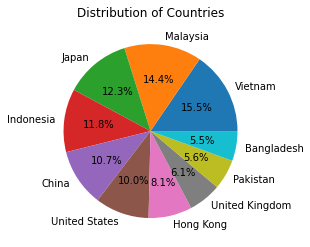

In [60]:
import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['countries_exported'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Countries')
plt.show()

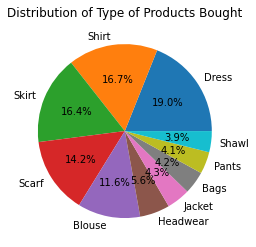

In [61]:

import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['type_of_product'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Type of Products Bought')
plt.show()

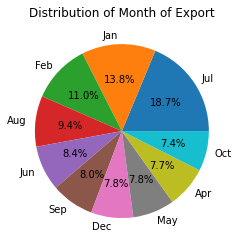

In [62]:
import matplotlib.pyplot as plt

# Count the number of exports by country and sort in descending order
type_of_pdt = df['month_of_export'].value_counts().sort_values(ascending=False)

# Select the top 10 countries with the highest number of exports
top_types = type_of_pdt[:10]

# Create a pie chart to visualize the distribution of exports by country
plt.pie(top_types, labels=top_types.index, autopct='%1.1f%%')
plt.title('Distribution of Month of Export')
plt.show()

### Predict the amount of demand (qty exported) I can expect during that period, based on month of exports and country

In [122]:

df = df.sample(frac=1, random_state=42)
df.columns

Index(['textile_type', 'qty_exported', 'countries_exported', 'type_of_product',
       'per_unit_cost', 'total_price', 'year_of_export', 'month_of_export',
       'customer_name', 'seller_name'],
      dtype='object')

In [128]:
X=df[['textile_type', 'month_of_export', 'countries_exported']]

y=df['type_of_product']

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np 

def preprocess_data(X):
    # if it is a numeric column - 
    # Normalize using MinMaxScaler to constrain values to between 0 and 1.

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = X.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        #MinMaxScale needs [n_samples, n_features] and hence requires df[[col]]
        X[col] = scaler.fit_transform(X[[col]])
        
    print("---Successfully processed numeric column(s)")
    print(X.head(5))
    
    # if it is a categorical column, need to convert the column into one-hot encoding
    df_categorical = X.select_dtypes(exclude=[np.number])
    categorical_cols = df_categorical.columns.values

    X = pd.get_dummies(X,columns=categorical_cols)
           
    print("---Successfully processed categorical column(s)")
    print(X.head(5))
        
    return X,scaler

In [131]:
# y = np.array(y)

# from scipy.stats import skew

# # assume data is a 1D numpy array or a pandas Series
# skewness = skew(y)
# print('Skewness:', skewness)


In [137]:
X,scaler = preprocess_data(X)

---Successfully processed numeric column(s)
   textile_type_batik  textile_type_cotton  textile_type_flax  \
0                 0.0                  0.0                0.0   
1                 0.0                  0.0                0.0   
2                 0.0                  1.0                0.0   
3                 0.0                  0.0                1.0   
4                 0.0                  0.0                0.0   

   textile_type_jute  textile_type_linen  textile_type_nylon  \
0                0.0                 0.0                 0.0   
1                0.0                 1.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   textile_type_polyester  textile_type_rayon  textile_type_silk  \
0                     1.0                 0.0                0.0   
1                     0.0                 0.

In [144]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate the model object
model = CatBoostClassifier(learning_rate=0.1, random_seed=5)

# Fit the model with the training data
model.fit(X_train, y_train)  # set verbose=False if you find the logs too long

# Predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)



0:	learn: 2.2701985	total: 7.24ms	remaining: 7.23s
1:	learn: 2.2437759	total: 13.4ms	remaining: 6.67s
2:	learn: 2.2222833	total: 17.6ms	remaining: 5.85s
3:	learn: 2.2042065	total: 22.5ms	remaining: 5.61s
4:	learn: 2.1887705	total: 27.1ms	remaining: 5.38s
5:	learn: 2.1766575	total: 30.4ms	remaining: 5.04s
6:	learn: 2.1658455	total: 34.4ms	remaining: 4.87s
7:	learn: 2.1571732	total: 37.8ms	remaining: 4.68s
8:	learn: 2.1493055	total: 41.8ms	remaining: 4.6s
9:	learn: 2.1427678	total: 45.5ms	remaining: 4.5s
10:	learn: 2.1369585	total: 49.1ms	remaining: 4.42s
11:	learn: 2.1322089	total: 52.6ms	remaining: 4.33s
12:	learn: 2.1282282	total: 55.4ms	remaining: 4.21s
13:	learn: 2.1245456	total: 59ms	remaining: 4.15s
14:	learn: 2.1213182	total: 62.1ms	remaining: 4.08s
15:	learn: 2.1185912	total: 65.1ms	remaining: 4.01s
16:	learn: 2.1162861	total: 68.1ms	remaining: 3.94s
17:	learn: 2.1140310	total: 71.2ms	remaining: 3.88s
18:	learn: 2.1118988	total: 74.2ms	remaining: 3.83s
19:	learn: 2.1098733	total

169:	learn: 1.9989453	total: 602ms	remaining: 2.94s
170:	learn: 1.9983830	total: 605ms	remaining: 2.93s
171:	learn: 1.9977642	total: 608ms	remaining: 2.93s
172:	learn: 1.9971283	total: 612ms	remaining: 2.92s
173:	learn: 1.9965605	total: 615ms	remaining: 2.92s
174:	learn: 1.9956097	total: 618ms	remaining: 2.92s
175:	learn: 1.9949555	total: 622ms	remaining: 2.91s
176:	learn: 1.9944741	total: 626ms	remaining: 2.91s
177:	learn: 1.9937563	total: 629ms	remaining: 2.91s
178:	learn: 1.9931025	total: 633ms	remaining: 2.9s
179:	learn: 1.9927395	total: 636ms	remaining: 2.9s
180:	learn: 1.9920904	total: 639ms	remaining: 2.89s
181:	learn: 1.9916791	total: 643ms	remaining: 2.89s
182:	learn: 1.9909014	total: 646ms	remaining: 2.88s
183:	learn: 1.9904630	total: 650ms	remaining: 2.88s
184:	learn: 1.9900319	total: 653ms	remaining: 2.88s
185:	learn: 1.9894623	total: 656ms	remaining: 2.87s
186:	learn: 1.9889965	total: 660ms	remaining: 2.87s
187:	learn: 1.9884922	total: 663ms	remaining: 2.86s
188:	learn: 1.

345:	learn: 1.9149699	total: 1.2s	remaining: 2.26s
346:	learn: 1.9145896	total: 1.2s	remaining: 2.26s
347:	learn: 1.9142029	total: 1.2s	remaining: 2.25s
348:	learn: 1.9137393	total: 1.21s	remaining: 2.25s
349:	learn: 1.9134327	total: 1.21s	remaining: 2.25s
350:	learn: 1.9131340	total: 1.22s	remaining: 2.25s
351:	learn: 1.9127383	total: 1.22s	remaining: 2.24s
352:	learn: 1.9122259	total: 1.22s	remaining: 2.24s
353:	learn: 1.9119100	total: 1.23s	remaining: 2.24s
354:	learn: 1.9114943	total: 1.23s	remaining: 2.23s
355:	learn: 1.9112670	total: 1.23s	remaining: 2.23s
356:	learn: 1.9108977	total: 1.24s	remaining: 2.23s
357:	learn: 1.9104859	total: 1.24s	remaining: 2.22s
358:	learn: 1.9100953	total: 1.24s	remaining: 2.22s
359:	learn: 1.9096834	total: 1.25s	remaining: 2.21s
360:	learn: 1.9092885	total: 1.25s	remaining: 2.21s
361:	learn: 1.9089794	total: 1.25s	remaining: 2.21s
362:	learn: 1.9086878	total: 1.25s	remaining: 2.2s
363:	learn: 1.9082003	total: 1.26s	remaining: 2.2s
364:	learn: 1.907

520:	learn: 1.8552621	total: 1.79s	remaining: 1.65s
521:	learn: 1.8549525	total: 1.79s	remaining: 1.64s
522:	learn: 1.8546401	total: 1.8s	remaining: 1.64s
523:	learn: 1.8542712	total: 1.8s	remaining: 1.64s
524:	learn: 1.8540387	total: 1.8s	remaining: 1.63s
525:	learn: 1.8537693	total: 1.81s	remaining: 1.63s
526:	learn: 1.8534717	total: 1.81s	remaining: 1.63s
527:	learn: 1.8531047	total: 1.81s	remaining: 1.62s
528:	learn: 1.8528370	total: 1.82s	remaining: 1.62s
529:	learn: 1.8525416	total: 1.82s	remaining: 1.61s
530:	learn: 1.8523689	total: 1.82s	remaining: 1.61s
531:	learn: 1.8521225	total: 1.83s	remaining: 1.61s
532:	learn: 1.8518649	total: 1.83s	remaining: 1.6s
533:	learn: 1.8515206	total: 1.83s	remaining: 1.6s
534:	learn: 1.8511031	total: 1.84s	remaining: 1.6s
535:	learn: 1.8508635	total: 1.84s	remaining: 1.59s
536:	learn: 1.8505511	total: 1.84s	remaining: 1.59s
537:	learn: 1.8503344	total: 1.85s	remaining: 1.59s
538:	learn: 1.8500794	total: 1.85s	remaining: 1.58s
539:	learn: 1.8498

695:	learn: 1.8081969	total: 2.38s	remaining: 1.04s
696:	learn: 1.8078722	total: 2.39s	remaining: 1.04s
697:	learn: 1.8076462	total: 2.39s	remaining: 1.03s
698:	learn: 1.8074009	total: 2.39s	remaining: 1.03s
699:	learn: 1.8071467	total: 2.4s	remaining: 1.03s
700:	learn: 1.8068855	total: 2.4s	remaining: 1.02s
701:	learn: 1.8066171	total: 2.4s	remaining: 1.02s
702:	learn: 1.8063873	total: 2.41s	remaining: 1.02s
703:	learn: 1.8061393	total: 2.41s	remaining: 1.01s
704:	learn: 1.8058587	total: 2.42s	remaining: 1.01s
705:	learn: 1.8056338	total: 2.42s	remaining: 1.01s
706:	learn: 1.8054256	total: 2.42s	remaining: 1s
707:	learn: 1.8052443	total: 2.42s	remaining: 1s
708:	learn: 1.8049906	total: 2.43s	remaining: 997ms
709:	learn: 1.8047624	total: 2.43s	remaining: 994ms
710:	learn: 1.8045513	total: 2.44s	remaining: 990ms
711:	learn: 1.8043263	total: 2.44s	remaining: 987ms
712:	learn: 1.8041404	total: 2.44s	remaining: 983ms
713:	learn: 1.8038790	total: 2.45s	remaining: 980ms
714:	learn: 1.8037020

862:	learn: 1.7714553	total: 2.97s	remaining: 472ms
863:	learn: 1.7712557	total: 2.98s	remaining: 468ms
864:	learn: 1.7710572	total: 2.98s	remaining: 465ms
865:	learn: 1.7708413	total: 2.98s	remaining: 462ms
866:	learn: 1.7706354	total: 2.99s	remaining: 458ms
867:	learn: 1.7704198	total: 2.99s	remaining: 455ms
868:	learn: 1.7702562	total: 2.99s	remaining: 451ms
869:	learn: 1.7699755	total: 3s	remaining: 448ms
870:	learn: 1.7697450	total: 3s	remaining: 444ms
871:	learn: 1.7695701	total: 3s	remaining: 441ms
872:	learn: 1.7693824	total: 3.01s	remaining: 438ms
873:	learn: 1.7692173	total: 3.01s	remaining: 434ms
874:	learn: 1.7690242	total: 3.01s	remaining: 431ms
875:	learn: 1.7688041	total: 3.02s	remaining: 427ms
876:	learn: 1.7686143	total: 3.02s	remaining: 424ms
877:	learn: 1.7684036	total: 3.02s	remaining: 420ms
878:	learn: 1.7682330	total: 3.03s	remaining: 417ms
879:	learn: 1.7681093	total: 3.03s	remaining: 413ms
880:	learn: 1.7679122	total: 3.03s	remaining: 410ms
881:	learn: 1.7677554

In [133]:
# Split feature and label sets to train and data sets - 80-20, random_state is desirable for reproducibility
# stratify parameter is not relevant for regression since it is not about splitting via category/class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 43) (3000, 43) (7000,) (3000,)


In [135]:
from sklearn.linear_model import LinearRegression


# Create Regression Model
#------------------------
model = LinearRegression()

# Train the model
#----------------
model.fit(X_train, y_train)

# Use model to make predictions
#------------------------------
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Bags'

In [134]:
from sklearn.metrics import mean_absolute_error

# Evaluation - using relevant metrics
#------------------------------------
# print("Model Features:", model.feature_names_in_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

AttributeError: 'CatBoostRegressor' object has no attribute 'coef_'

In [82]:
from sklearn.metrics import r2_score

# Coefficient of Determination of the model
#------------------------------------------
print("Coefficient of Determination or r-squared:", r2_score(y_test, y_pred))

Coefficient of Determination or r-squared: -0.0016031477381517334
